In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dados/exames.csv')
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Exame malígno(M) ou benígno(B)

In [3]:
df.shape

(569, 35)

<font color="red">

### ValueError: Input X contains NaN

</font>

### Temos valores vazios, vamos remover

In [4]:
df.isnull().sum()  # coluna "exame 33" possui 419 exames vazios (74% dos dados)

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [5]:
# removendo coluna 'exame_33'
df_v1 = df.drop(columns='exame_33')

## train_test_split

In [6]:
from sklearn.model_selection import train_test_split
from numpy import random

# SEED
SEED = 1234
random.seed(SEED)

# valores dos exames e diagnósticos
X = df_v1.drop(columns=['id', 'diagnostico'])
y = df_v1.diagnostico

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
display(X_train.head(), y_train.head())

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
391,8.734,16.84,55.27,103.78,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,...,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.786,0.00000,0.2445,0.08865
410,11.360,17.57,72.49,103.78,399.8,0.08858,0.05313,0.02783,0.02100,0.1601,...,36.32,85.07,521.3,0.1453,0.1622,0.1811,0.786,0.08698,0.2973,0.07745
138,14.950,17.57,96.85,103.78,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,...,21.43,121.40,971.4,0.1411,0.2164,0.3355,0.786,0.16670,0.3414,0.07147
261,17.350,23.06,111.00,103.78,933.1,0.08662,0.06290,0.02891,0.02837,0.1564,...,31.47,128.20,1218.0,0.1240,0.1486,0.1211,0.786,0.08235,0.2452,0.06515
507,11.060,17.12,71.25,103.78,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,...,20.74,76.08,411.1,0.1662,0.2031,0.1256,0.786,0.09514,0.2780,0.11680


391    B
410    B
138    M
261    M
507    B
Name: diagnostico, dtype: object

## RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

print(f"Acurácia no RandomForestClassifier: |{accuracy*100:.2f}|%")

Acurácia no RandomForestClassifier: |92.40|%


## DummyClassifier

In [9]:
# Usaremos o DummyClassifier, que é um classificador mais ingênuo e cuja estratégia de classificaçãopode ser setada.
# No caso, a estratégia será pegar o diagnóstico que mais ocorre e utilizá-lo em todas as ocorrências de classificação.

In [10]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
accuracy = dummy.score(X_test, y_test)

print(f"Acurácia no DummyClassifier: |{accuracy*100:.2f}|%")

Acurácia no DummyClassifier: |61.40|%


***

## Visualização

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Padronização de dados
scaler = StandardScaler()
scaler.fit(X)
X_v1 = scaler.transform(X)
X_v1 = pd.DataFrame(data=X_v1, columns=X.keys())

In [12]:
def grafico_violino(valores, inicio, fim):
    # melt dados
    df_plot = pd.concat([y, valores.iloc[:, inicio:fim]], axis=1)
    df_plot = pd.melt(df_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

    # gráfico
    plt.figure(figsize=(10,6))
    sns.violinplot(x='exames', y='valores', hue='diagnostico', 
                   data=df_plot, split=2)
    plt.xticks(rotation=90)
    plt.title(f'Valores Exames por Diagnóstico (M x B), de {inicio+1} à {fim}')

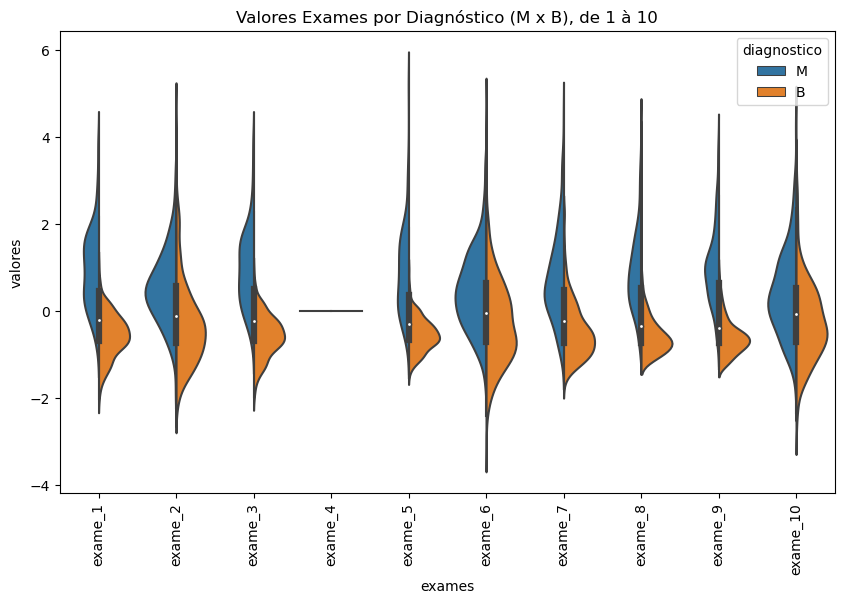

In [13]:
grafico_violino(X_v1, 0, 10)

In [14]:
# o exame_4 tem todos valores iguais, não ajuda nosso algoritmo
df.exame_4.unique()

array([103.78])

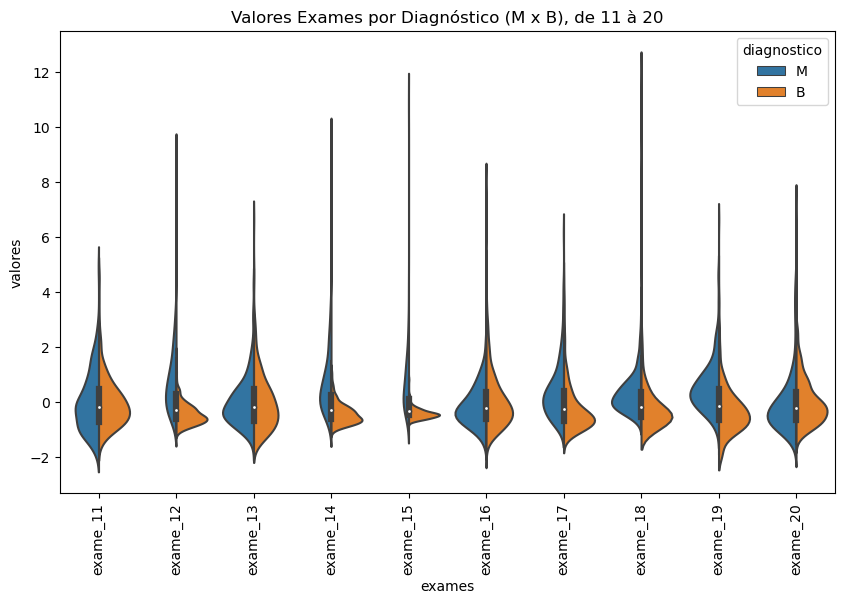

In [15]:
grafico_violino(X_v1, 10, 20)

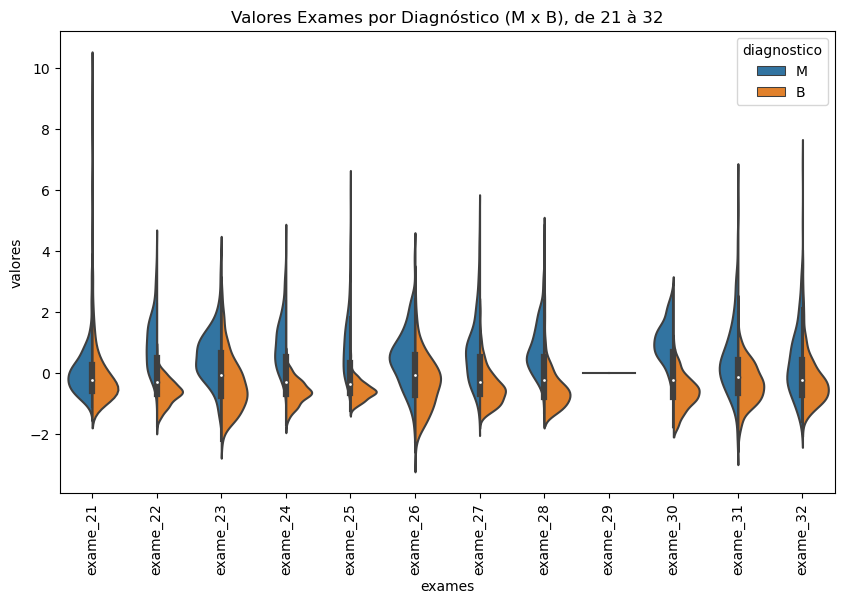

In [16]:
grafico_violino(X_v1, 20, 32)

In [17]:
# o exame_29 tem todos valores iguais, não ajuda nosso algoritmo
df.exame_29.unique()

array([0.786])

In [18]:
X_v2 = X_v1.drop(columns=['exame_4', 'exame_29'])
X_v2.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [19]:
def classificar(valores):
    
    SEED = 1234
    random.seed(SEED)

    X_train, X_test, y_train, y_test = train_test_split(valores, y, test_size=0.3)

    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)

    print(f"Acurácia no RandomForestClassifier: |{accuracy*100:.2f}|%")

In [20]:
classificar(X_v2)

Acurácia no RandomForestClassifier: |92.98|%


***

## Matriz de Correlação

In [21]:
X_v2.corr().head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


<Axes: >

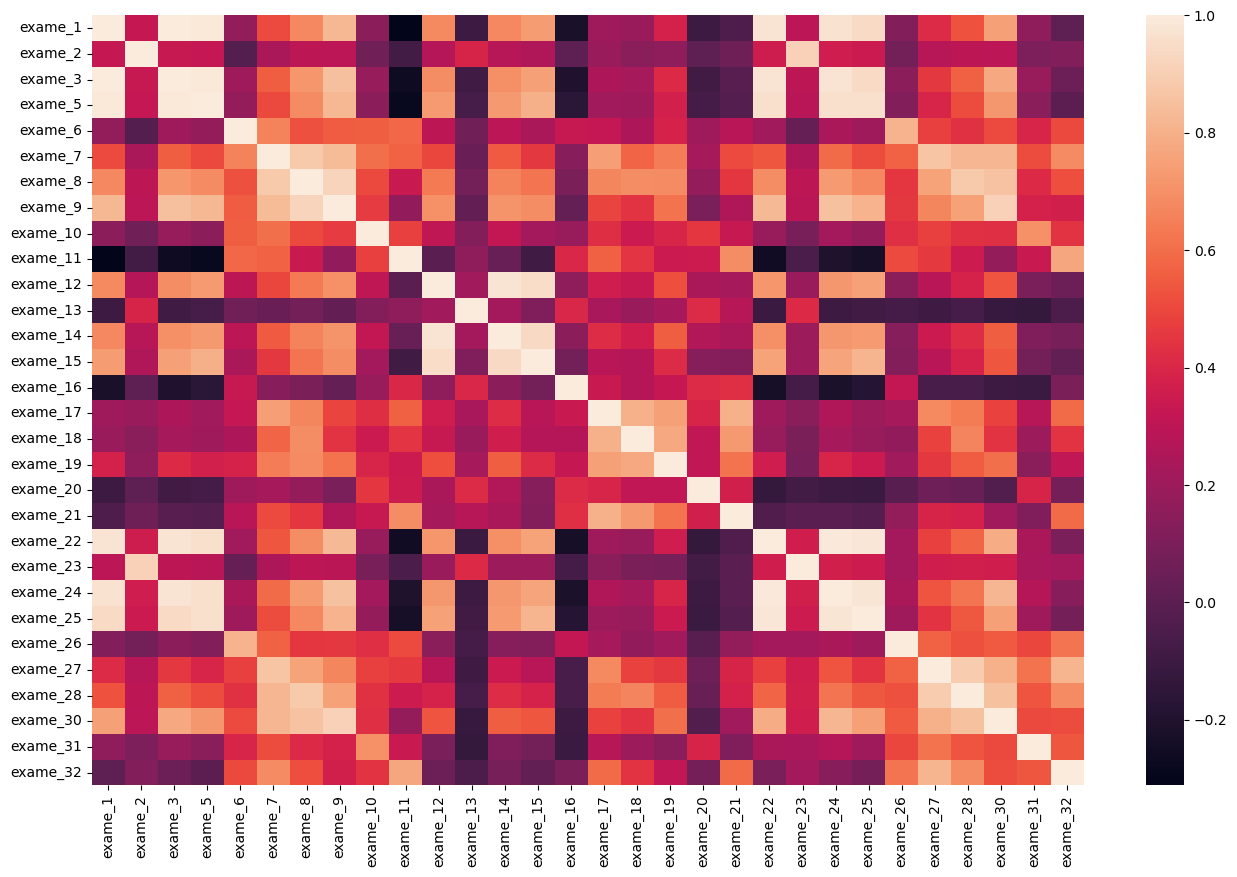

In [22]:
# mapa de calor
matriz_correlacao = X_v2.corr()
plt.figure(figsize=(16,10))
sns.heatmap(matriz_correlacao)

In [23]:
# variáveis altamente correlacionadas
matriz_correlacao_v1 =  matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [24]:
# 1 e 3, 22 e 24, estão altamente correlacionadas, vamos remover uma de cada
X_v3 = X_v2.drop(columns=['exame_3', 'exame_24'])
X_v3.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [25]:
classificar(X_v3)

Acurácia no RandomForestClassifier: |92.98|%


***

# SelectKBest

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SEED = 1234
random.seed(SEED)

# chi2 não aceita valores negativos, então vamos pegar os dados antes de normalizar
X_v0 = X.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])
X_train, X_test, y_train, y_test = train_test_split(X_v0, y, test_size=0.3)

# SelectKBest
selecionar_kmelhores = SelectKBest(score_func=chi2, k=5)
selecionar_kmelhores.fit(X_train, y_train)
treino_kbest = selecionar_kmelhores.transform(X_train)
teste_kbest = selecionar_kmelhores.transform(X_test)

# verificando se sobraram somente 5 colunas
treino_kbest.shape

(398, 5)

In [27]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(treino_kbest, y_train)
accuracy = clf.score(teste_kbest, y_test)

print(f"Acurácia no RandomForestClassifier: |{accuracy*100:.2f}|%")

Acurácia no RandomForestClassifier: |92.98|%


### Conseguimos reduzir para somente 5 variáveis, e continuar com a mesma acurácia 
(a melhor acurácia que consegui fazendo testes, foi utilizando k=12)

***

## Matriz de Confusão
### Acertando mais quando é B ou M ?

In [28]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_test, clf.predict(teste_kbest))
matriz_confusao

array([[101,   4],
       [  8,  58]], dtype=int64)

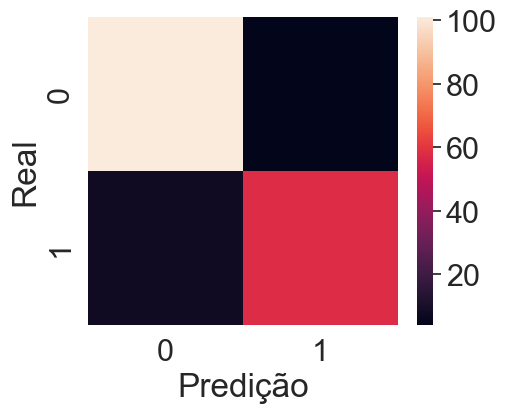

In [29]:
plt.figure(figsize = (5, 4))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao).set(xlabel = "Predição", ylabel = "Real")
plt.show()

105 valores corretos em 0(B), e 58 valores corretos e 8 errados em 1(M)

***

## Seleção com RFE

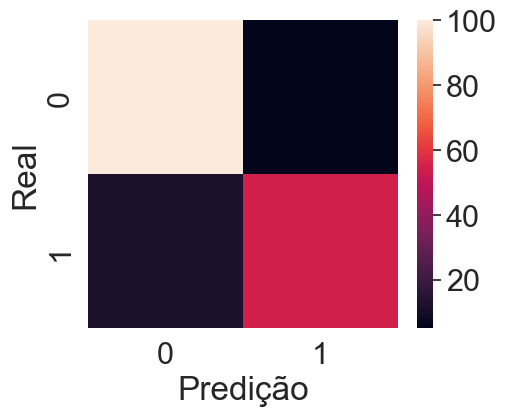

[100   5]
[12 54]

Acurácia no RandomForestClassifier: |90.06|%


In [30]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X_v0, y, test_size=0.3)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

select_rfe = RFE(estimator=clf, n_features_to_select=5, step=1)
select_rfe.fit(X_train, y_train)
treino_rfe = select_rfe.transform(X_train)
teste_rfe = select_rfe.transform(X_test)
clf.fit(treino_rfe, y_train)

matriz_confusao = confusion_matrix(y_test, clf.predict(teste_rfe))
plt.figure(figsize = (5, 4))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao).set(xlabel = "Predição", ylabel = "Real")
plt.show()
print(*matriz_confusao, sep='\n')

accuracy = clf.score(teste_rfe, y_test)
print(f"\nAcurácia no RandomForestClassifier: |{accuracy*100:.2f}|%")

***

## Seleção com RFECV

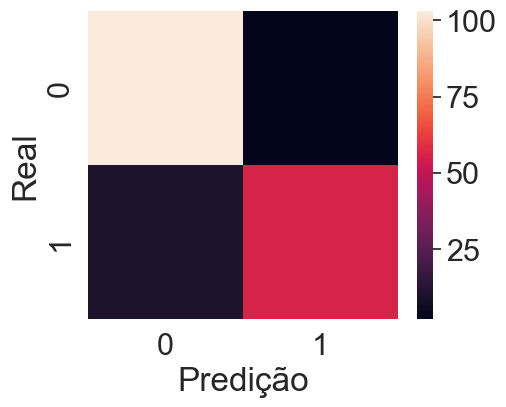

[103   2]
[10 56]

Acurácia no RandomForestClassifier: |92.98|%


In [31]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X_v0, y, test_size=0.3)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

select_rfecv = RFECV(estimator=clf, cv=5, step=1, scoring='accuracy')
select_rfecv.fit(X_train, y_train)
treino_rfecv = select_rfecv.transform(X_train)
teste_rfecv = select_rfecv.transform(X_test)
clf.fit(treino_rfecv, y_train)

matriz_confusao = confusion_matrix(y_test, clf.predict(teste_rfecv))
plt.figure(figsize = (5, 4))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao).set(xlabel = "Predição", ylabel = "Real")
plt.show()
print(*matriz_confusao, sep='\n')

accuracy = clf.score(teste_rfecv, y_test)
print(f"\nAcurácia no RandomForestClassifier: |{accuracy*100:.2f}|%")

In [52]:
# quantidade de features que ele julgou como necessárias para o melhor resultado
print(select_rfecv.n_features_)
# quais são
print(X_train.columns[select_rfecv.support_])
# scores para cada
print(select_rfecv.cv_results_['mean_test_score'])

21
Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_18', 'exame_21',
       'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_30', 'exame_31', 'exame_32'],
      dtype='object')
[0.89186709 0.9371519  0.94724684 0.94727848 0.95227848 0.95481013
 0.95231013 0.95731013 0.95227848 0.94974684 0.95731013 0.96227848
 0.95727848 0.95727848 0.96227848 0.95977848 0.96231013 0.96231013
 0.96234177 0.95231013 0.96734177 0.96234177 0.96484177 0.95481013
 0.95731013 0.96231013 0.96234177 0.95984177]


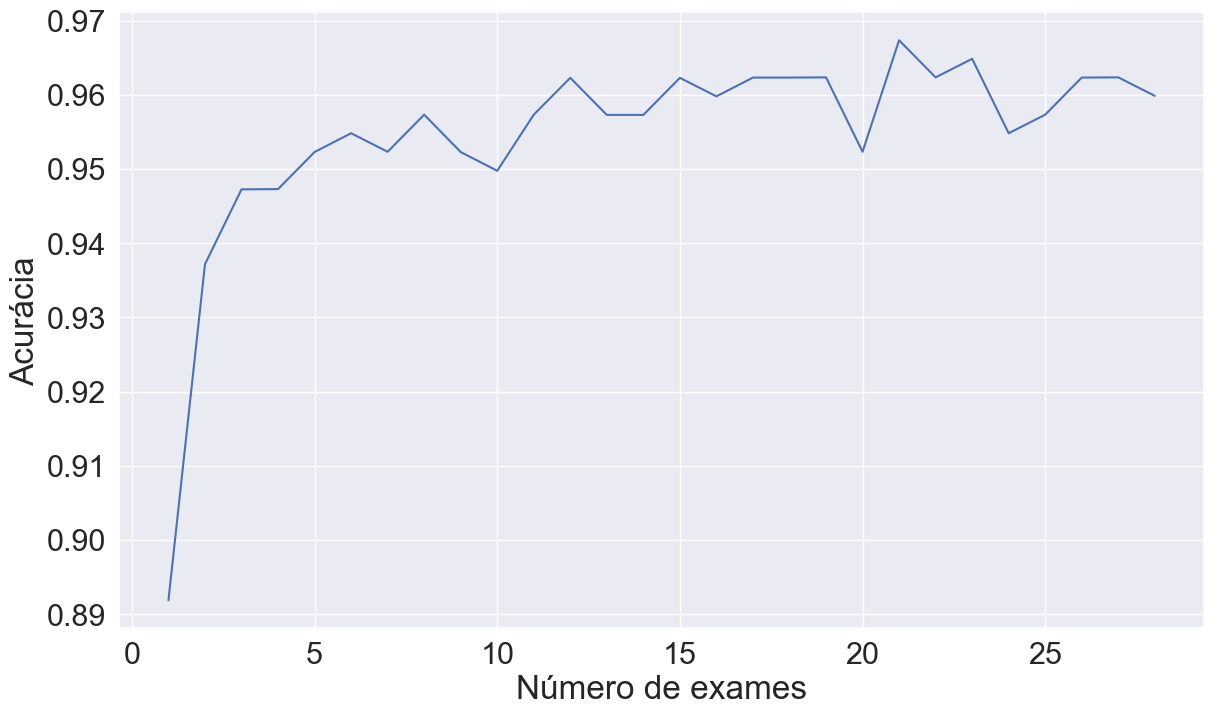

In [56]:
# porque escolheu tais features

plt.figure(figsize=(14,8))
plt.xlabel('Número de exames')
plt.ylabel('Acurácia')
plt.plot(range(1, len(select_rfecv.cv_results_['mean_test_score']) + 1), select_rfecv.cv_results_['mean_test_score'])
plt.show()

## Visualizando dados no plano

In [70]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X_v0, y, test_size=0.3)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

select_rfe = RFE(estimator=clf, n_features_to_select=2, step=1)
select_rfe.fit(X_train, y_train)
treino_rfe = select_rfe.transform(X_train)
teste_rfe = select_rfe.transform(X_test)
clf.fit(treino_rfe, y_train)

RandomForestClassifier()

In [71]:
X_v4 = select_rfe.transform(X_v3)
X_v4.shape

(569, 2)

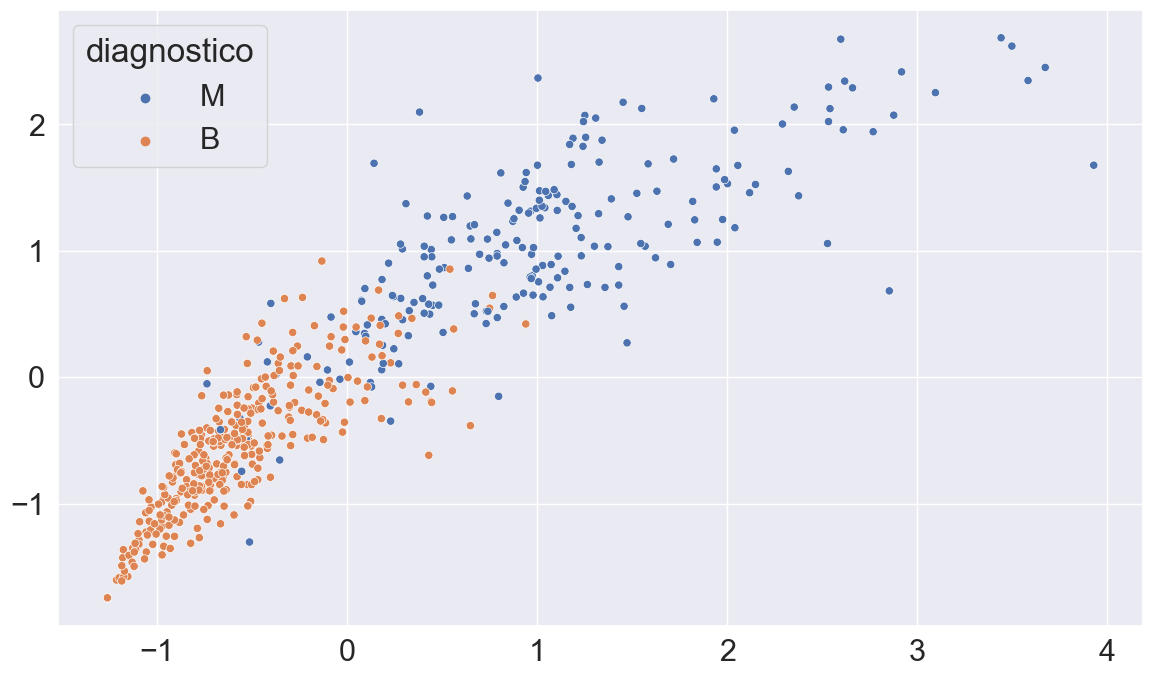

In [72]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=X_v4[:,0], y=X_v4[:,1], hue=y)
plt.show()

#### Não ficou bom

## PCA

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_v5 = pca.fit_transform(X_v3)
X_v5

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

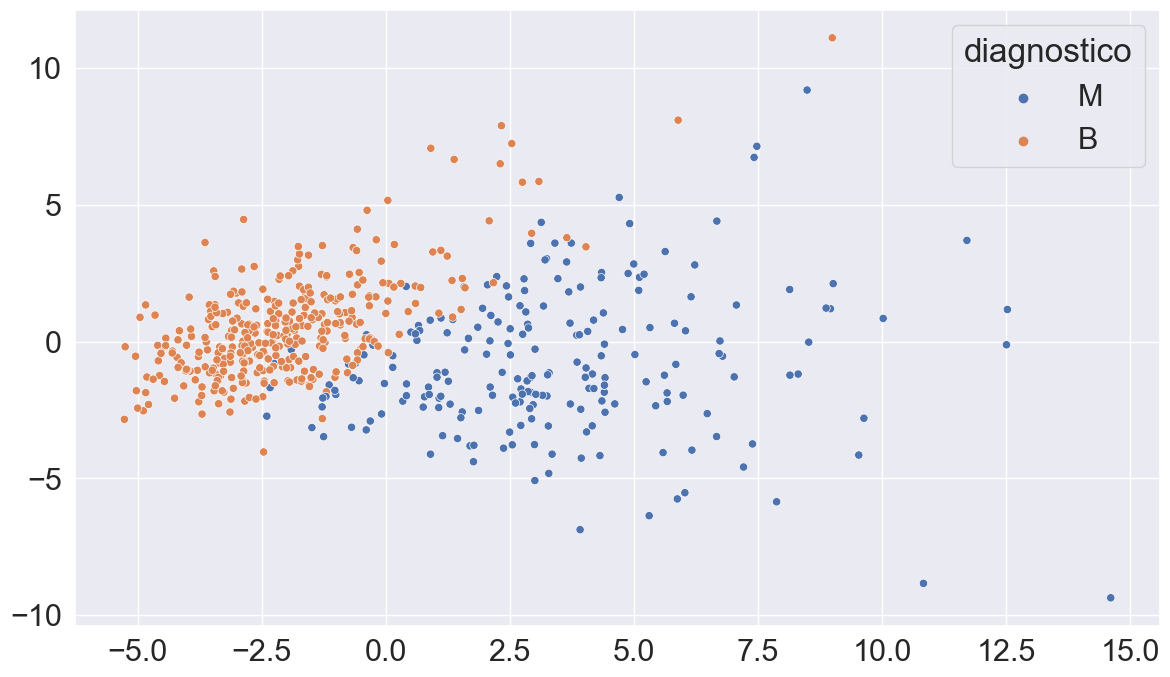

In [77]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=X_v5[:,0], y=X_v5[:,1], hue=y)
plt.show()

## TSNE

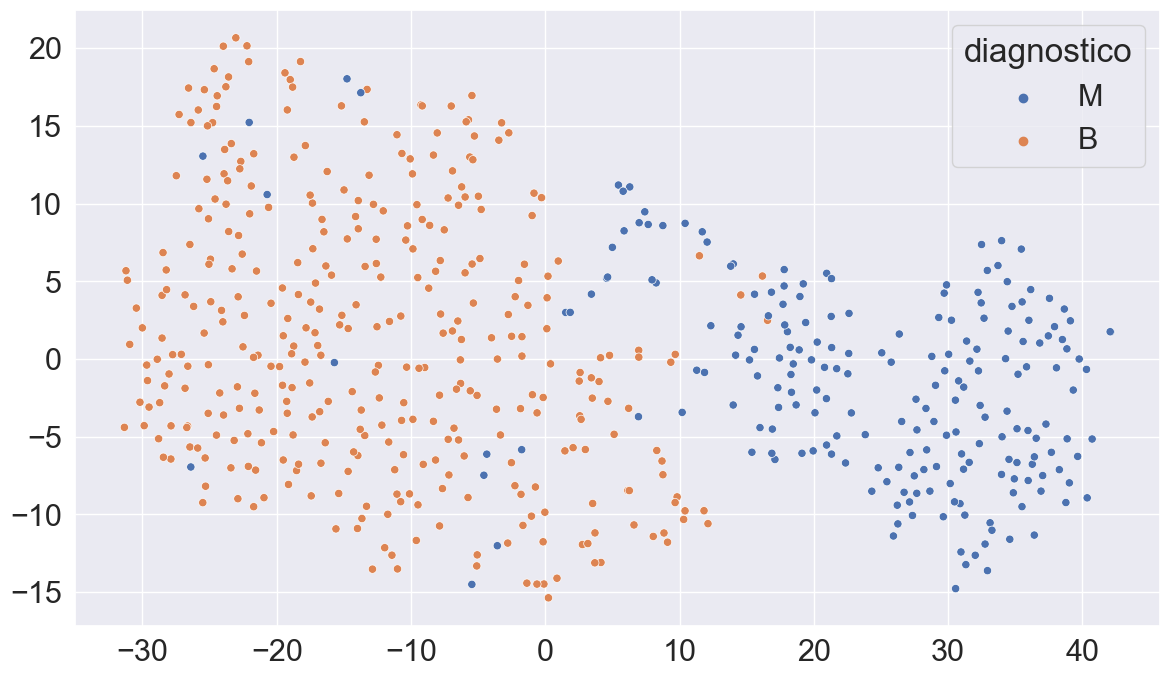

In [78]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_v6 = tsne.fit_transform(X_v3)

plt.figure(figsize=(14,8))
sns.scatterplot(x=X_v6[:,0], y=X_v6[:,1], hue=y)
plt.show()